# Illustrate the effect of Reshaping
* Naive reshaping: Apply reshaping directly to (28,28) input data
* Reshaping after splitting: Apply split function on (28,28) input data first to get the correct pixel order.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
import keras.backend as K

In [2]:
nrows, ncols = 28, 28
nnrows, nncols = 14, 14

### 1. Generate data

In [3]:
(_, _), (X, _) = keras.datasets.mnist.load_data()
X = tf.reshape(X, (-1,nrows,ncols,1))
X = tf.cast(X, 'float32') / 255.

### 2. Reshaper model

In [4]:
class Reshaper(keras.models.Model):
    # Reshape arbitrary input to output along sampling dimension
    def __init__(self, input_shape, output_shape):
        model_in  = keras.layers.Input(shape=input_shape)
        model_out = K.concatenate( (K.variable([-1], dtype='int32'), output_shape) ) # -1 (arbitrary samples)
        shaper = keras.layers.Lambda( lambda x: K.reshape(x, model_out) )(model_in)
        super(Reshaper, self).__init__(inputs=model_in, outputs=shaper)

### 3. Naive reshaping
* Reshaper model is equivalent to tensorflow reshaper if sum of input dimensions=sum of output dimensions.
* Naive reshaping scrambles up generated patches. $\rightarrow$ Not desired.

TF reshape:  (1, 28, 28, 1) -> (4, 14, 14, 1)
Model reshaper:  (1, 28, 28, 1) -> (4, 14, 14, 1)


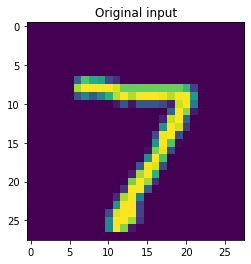

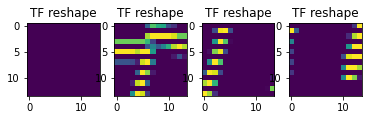

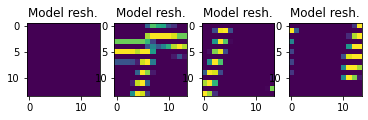

In [11]:
x = X[:1]
fig, ax = plt.subplots()
plt.imshow(tf.reshape(x, (nrows,ncols)))
plt.title("Original input")

x_reshaped_tf = tf.reshape(x, (4,14,14,1)) # Tensorflow reshape
print("TF reshape: ", x.shape, "->", x_reshaped_tf.shape)
fig, axs = plt.subplots(1,4)
for i, ax in enumerate(axs):
    ax.imshow(tf.reshape(x_reshaped_tf[i], (14,14)))
    ax.set_title("TF reshape")

reshaper = Reshaper([nrows,ncols,1], [nnrows,nncols,1]) # Reshaper model
x_reshaped_model = reshaper(x)
print("Model reshaper: ", x.shape, "->", x_reshaped_model.shape)

fig, axs = plt.subplots(1,4)
for i, ax in enumerate(axs):
    ax.imshow(tf.reshape(x_reshaped_model[i], (14,14)))
    ax.set_title("Model resh.")

### 4. Reshaping after **splitting**
* The `split` method correctly takes care of pixel order.
* The generated patches correspond to the four quadrants of the input image.

(1, 28, 28, 1) -> (4, 14, 14, 1)


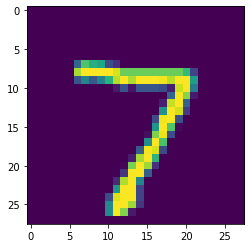

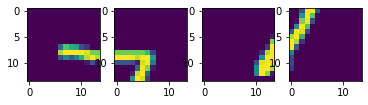

In [7]:
def split(x, nrows=nrows, nsidelen=nnrows):
    x = x.reshape(nrows//nsidelen,nsidelen,-1,nsidelen)
    x = x.swapaxes(1,2)
    return x.reshape(-1,nsidelen,nsidelen,1)

x_split = np.array([split(x) for x in X.numpy()])
x_reshaped = x_split[:1].reshape(4,14,14,1)
print(x.shape, "->", x_reshaped.shape)

fig, ax = plt.subplots()
plt.imshow(tf.reshape(x, (nrows,ncols)))

fig, axs = plt.subplots(1,4)
for i, ax in enumerate(axs):
    ax.imshow(tf.reshape(x_reshaped[i], (14,14)))